# bike sharing system

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import datasets, linear_model

In [6]:
from sklearn import metrics

In [7]:
from sklearn.preprocessing import scale


In [8]:
from sklearn import tree


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
df=pd.read_csv('E:/bike sharing system/bike sharing code/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,check_out,check in
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,13
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,32
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,27
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,10
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


# historical average

In [11]:
d=df.loc[(df['hr'] == 8) & (df['weekday']==0)]

In [12]:
cnt=d.check_out

In [13]:
lt=[]
for i in cnt:
    lt.append(i)

In [14]:
l=len(lt)

In [15]:
s=sum(lt)

In [16]:
avg=s//l

In [17]:
print("the historical average of bikes in particular time is ",avg)

the historical average of bikes in particular time is  83


# plots for different environmental conditions

Text(0,0.5,'Count of all Biks Rented')

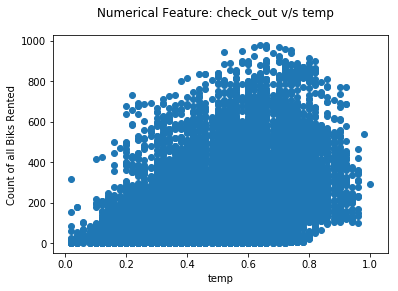

In [18]:
plt.scatter(df['temp'],df['check_out'])
plt.suptitle('Numerical Feature: check_out v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0,0.5,'Count of all Biks Rented')

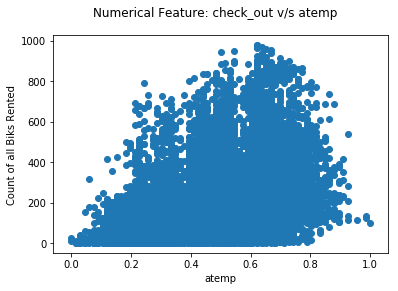

In [19]:
plt.scatter(df['atemp'], df['check_out'])
plt.suptitle('Numerical Feature: check_out v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

as we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. 
to keep things clean we can drop the 'atemp' feature


Text(0,0.5,'Count of all Biks Rented')

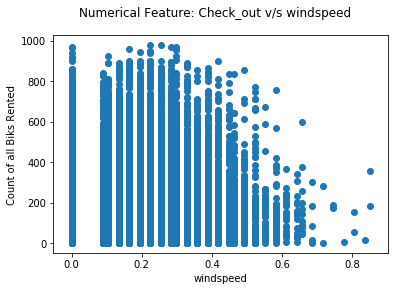

In [20]:
plt.scatter(df['windspeed'], df['check_out'])
plt.suptitle('Numerical Feature: Check_out v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

For 'hum' or humidity looks like a big blob throught the edges so show some sparseness.
and for feature 'windspeed' shows inverse relationship with rentals

for conculsion we can say too much wind and bike rentals dont seem to mix

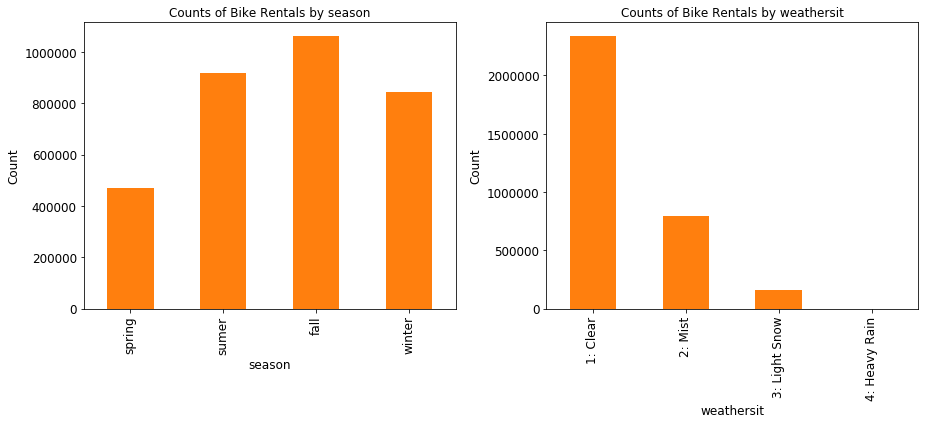

In [21]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = df[['season','check_out']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 =df[['weathersit','check_out']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()


the above graph of 'weathersit' shows that people tends to rent more bike in clear weather ad 'season' show the fall is the top season to rent bike.

# plots based on time

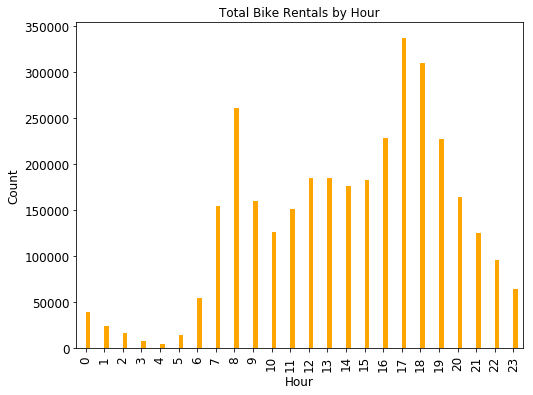

In [22]:
ax = df[['hr','check_out']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

# training and testing

the feature 'hr' or we can say rental hours, clear shows peak office commute hours and afternoon rides are very popular bike time.

In [89]:
data = df.copy()
target = 'check_out'
feature = [feat for feat in list(data) if feat not in [target, 'instant', 'dteday','check in','registered', 'casual']]
X_train, X_test, y_train, y_test = train_test_split(scale(data[feature]),
                                                   data[target],
                                                   test_size=0.3, random_state=42)




C:\Users\desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


# LINEAR REGRESSION

In [90]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Score: ", lr_model.score(X_test, y_test))

Score:  0.3871606738503981


# DECISION TREE


In [93]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
print ("Using Decision tree the Accuracy score is ",dt.score(X_test, y_test))

Using Decision tree the Accuracy score is  0.8831496471021556


# RANDOM FOREST


In [95]:
clf=RandomForestRegressor(n_estimators=150)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print ("Using randomforest tree the Accuracy score is ",clf.score(X_test, y_test))

Using randomforest tree the Accuracy score is  0.9446512395516482
